<a href="https://colab.research.google.com/github/hossainsiam133/AgriGrow/blob/main/Code/AgriGrow_Talha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### 1. Load Data

In [22]:
try:
    crop = pd.read_csv("Crop_recommendation.csv")
except FileNotFoundError:
    print("Error: 'Crop_recommendation.csv' not found. Please ensure the file is in the correct location.")
    exit()

crops = crop.copy()

## 2. Exploratory Data Analysis (EDA)

### 2.1 Dataset Info

In [23]:
print("--- EDA: Dataset Info ---")
print(crop.head(),"\n")
print(f"Shape: {crop.shape}")
print(f"\nMissing values per column:\n{crop.isnull().sum()}")
print(f"\nBasic Statistics:\n{crop.describe()}")

--- EDA: Dataset Info ---
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice 

Shape: (2200, 8)

Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Basic Statistics:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258

### 2.2 Correlation Heatmap

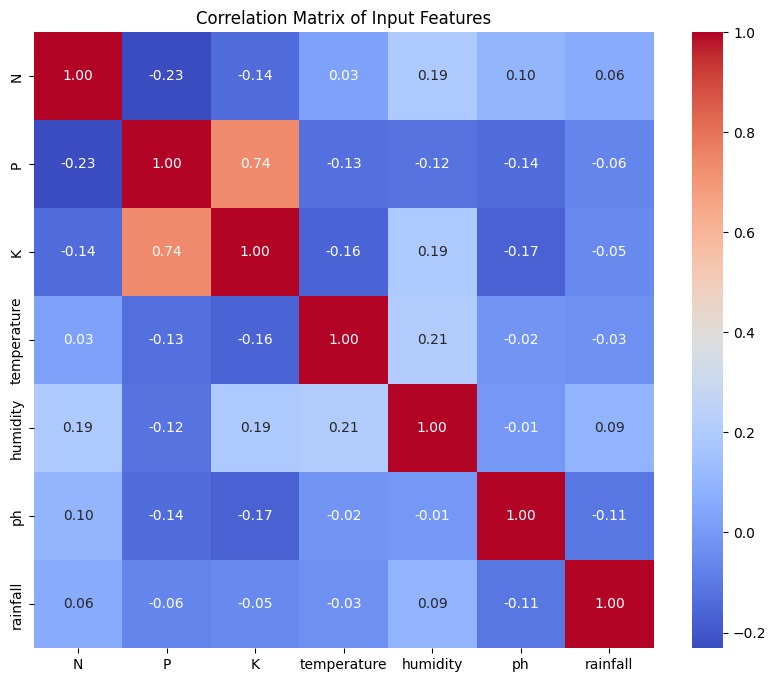

In [24]:
corr = crop.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Input Features")
plt.show()


## 3. Pre-processing and Encoding

### 3.1 label encoding

In [25]:
crop_dict = {
    'apple': 1, 'banana': 2, 'blackgram': 3, 'chickpea': 4, 'coconut': 5,
    'coffee': 6, 'cotton': 7, 'grapes': 8, 'jute': 9, 'kidneybeans': 10,
    'lentil': 11, 'maize': 12, 'mango': 13, 'mothbeans': 14, 'mungbean': 15,
    'muskmelon': 16, 'orange': 17, 'papaya': 18, 'pigeonpeas': 19,
    'pomegranate': 20, 'rice': 21, 'watermelon': 22
}
crop['label_num'] = crop['label'].map(crop_dict)
crop.drop('label', axis=1, inplace=True)
print("\nEncoded Data Head:")
print(crop.head())


Encoded Data Head:
    N   P   K  temperature   humidity        ph    rainfall  label_num
0  90  42  43    20.879744  82.002744  6.502985  202.935536         21
1  85  58  41    21.770462  80.319644  7.038096  226.655537         21
2  60  55  44    23.004459  82.320763  7.840207  263.964248         21
3  74  35  40    26.491096  80.158363  6.980401  242.864034         21
4  78  42  42    20.130175  81.604873  7.628473  262.717340         21


###  3.2 Define features (x) and target (y)

In [26]:
x = crop.drop('label_num', axis=1)
y = crop['label_num']

### 3.3 Train Test Split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 3.4 Standardization

In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 4. Model Training

### 4.1 Import models library

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Bagging': BaggingClassifier(random_state=42)
}

### 4.2 Get the models accuracy

In [30]:
results = {}
for name, md in models.items():
    md.fit(x_train, y_train)
    pred_y = md.predict(x_test)
    accuracy = accuracy_score(pred_y, y_test)
    results[name] = accuracy
    print(f"{name}: {accuracy * 100:.2f}%")

Logistic Regression: 96.36%
Support Vector Machine: 96.82%
Bagging: 99.09%


### 4.3 Determine the best model

In [31]:
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]
print(f"\nBest Accuracy: {best_model_name} ({best_model_accuracy * 100:.2f}%)")


Best Accuracy: Bagging (99.09%)


## 5. Report for Bagging

### 5.1 Confusion Matrix

In [32]:
bg = BaggingClassifier(random_state=42)
bg.fit(x_train, y_train)
y_pred_bg = bg.predict(x_test)
cm = confusion_matrix(y_test, y_pred_bg)
f1 = classification_report(y_test, y_pred_bg, output_dict=True)['weighted avg']['f1-score']

### 5.2 Reverse map the crop labels for plotting

In [33]:
reverse_crop_dict = {v: k for k, v in crop_dict.items()}
crop_labels = [reverse_crop_dict[i] for i in sorted(reverse_crop_dict.keys())]
# print(reverse_crop_dict)
# print(crop_labels)

### 5.3 Detailed Classification Report for Bagging

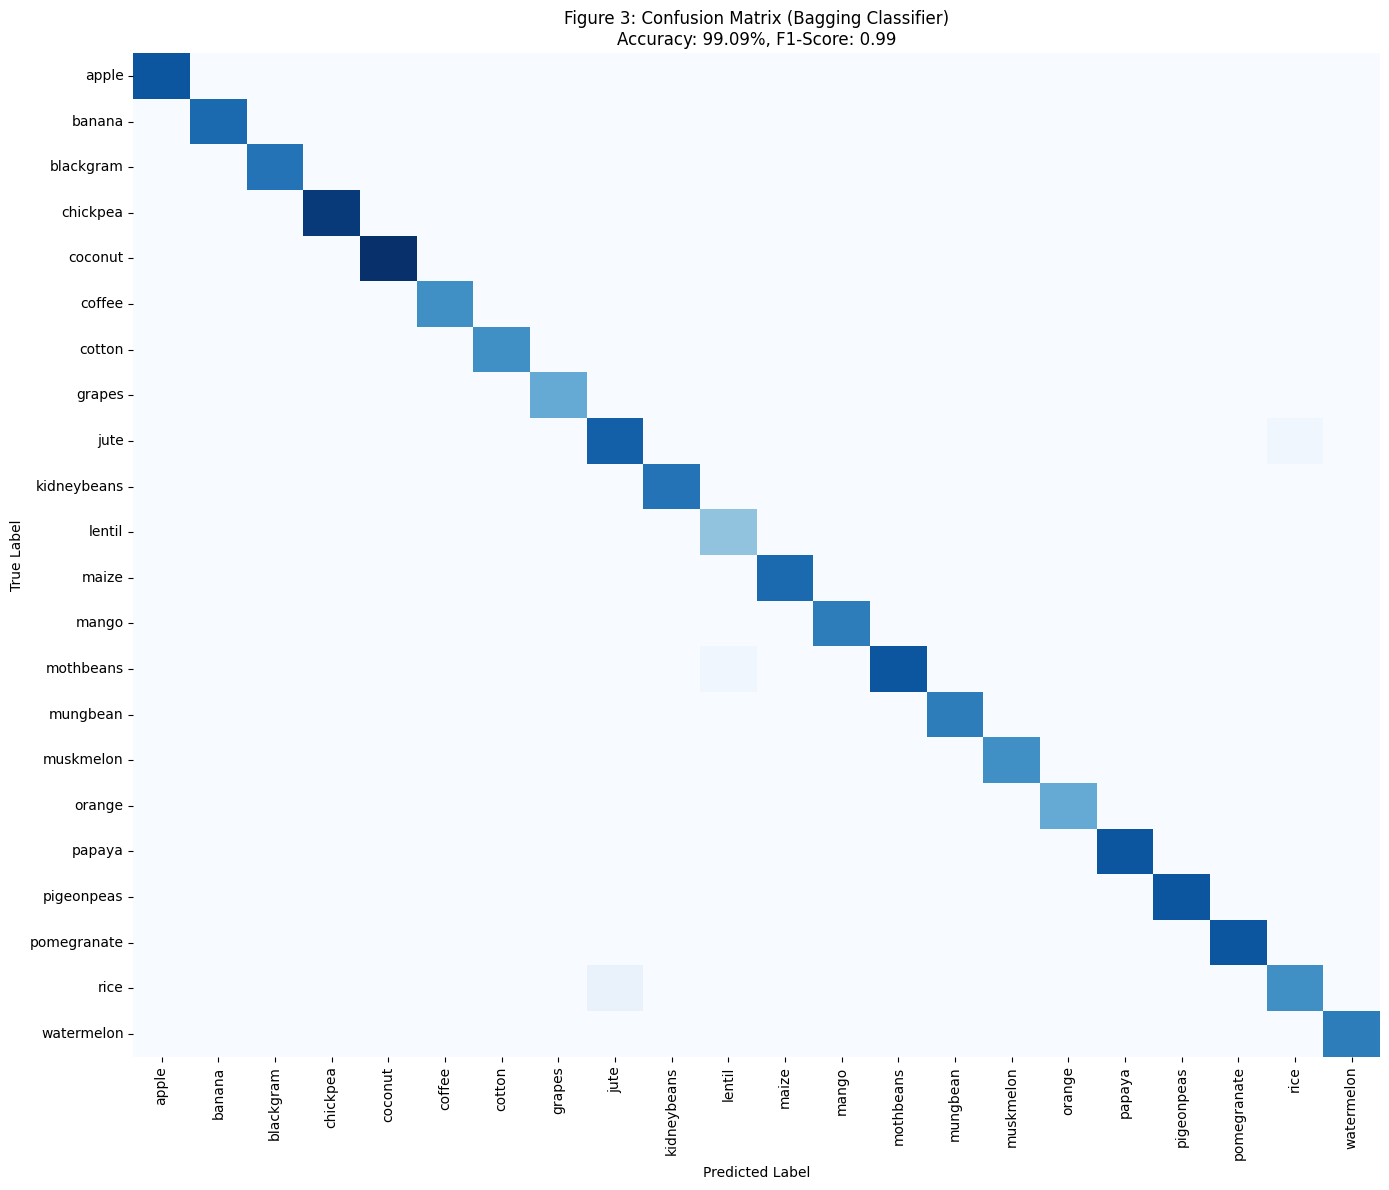

In [34]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=False,
            xticklabels=crop_labels, yticklabels=crop_labels)
plt.title(f"Figure 3: Confusion Matrix (Bagging Classifier)\nAccuracy: {results['Bagging']*100:.2f}%, F1-Score: {f1:.2f}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## 6. Final Recommendation Function

### 6.1 Prediction Function

In [35]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    input_scaled = sc.transform(input_data)

    predicted_num = bg.predict(input_scaled)[0]

    reverse_crop_dict = {v: k for k, v in crop_dict.items()}
    predicted_crop = reverse_crop_dict.get(predicted_num, "Unknown Crop")

    return predicted_crop

### 6.2 Example Prediction

In [36]:
N = 80
P = 40
K = 60
temperature = 26
humidity = 60
ph = 6.5
rainfall = 600

predicted_crop = recommendation(N, P, K, temperature, humidity, ph, rainfall)
print(f"\nPrediction for N={N}, P={P}, K={K}, Temp={temperature}, Humidity={humidity}, pH={ph}, Rainfall={rainfall}:")
print(f"Optimal Crop: {predicted_crop}")


Prediction for N=80, P=40, K=60, Temp=26, Humidity=60, pH=6.5, Rainfall=600:
Optimal Crop: coffee


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
